# 5 Noisy Data Analysis

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model, find_best_model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data


In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn,
                     )

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

# Benchmarking on Noisy Data

To benchmark on noisy data we conducted fits using both Adam and Trust Region Optimizers. We added noise in multiples of the standard deviation of the raw data. 

Training was saved after 900 seconds.

In [69]:
basepath = "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy"
filename = "Batch_Trainging_SpeedTest_3.csv"

results = find_best_model(basepath, filename)

## Visualization of Results

In [12]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 0), (-np.pi, np.pi)],
             image_scalebar=image_scalebar)

### Noise Level 0, ADAM Optimizer

#### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

##### Visualizing the Scaled Data



    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
./Figures/Figure_8_Scaled Raw Data_noise0_optimizer_Adam.png
./Figures/Figure_8_Scaled Raw Data_noise0_optimizer_Adam.svg


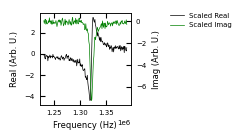

In [36]:
# Sets the dataset
noise = 0
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_8_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 8** shows the scaled data. The data is scaled to have a mean of 0 and a standard deviation of 1. This is done using a global scaler of the entire spectrum.


    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
./Figures/Figure_9_Phase_Shifted_Scaled_Histograms_noise{noise}_optimizer_{optimizer}.png
./Figures/Figure_9_Phase_Shifted_Scaled_Histograms_noise{noise}_optimizer_{optimizer}.svg


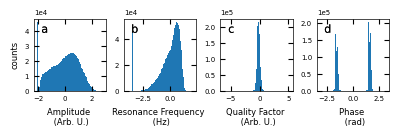

In [32]:
dataset.LSQF_phase_shift = np.pi / 2

BE_viz.SHO_hist(
    dataset.SHO_fit_results(), filename="Figure_9_Phase_Shifted_Scaled_Histograms_noise{noise}_optimizer_{optimizer}", 
)

**Figure 9** shows the histograms of the scaled a) amplitude, b) resonance frequency, c) quality factor, and d) phase. Note there is a transformation applied to the phase

'Trained Models/SHO Fitter//7_4_2023_SpeedTestTraining_Noisy//SHO_Adam_noise_0_batch_size_500_seed_43_model_epoch_4_train_loss_0.034088495460983484.pth'

In [41]:
# instantiate the model
model = SHO_Model(dataset, training=False)

Using GPU NVIDIA GeForce RTX 3090


In [70]:
model_name = basepath + "/" + results[(noise, optimizer)]['filename'].split("//")[-1] 

model.load(
    model_name#.replace('model_epoch', f'model_optimizer_{optimizer}_epoch')
)

In [65]:
import pandas as pd

# Read the CSV
df = pd.read_csv('/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy/Batch_Trainging_SpeedTest.csv')

# Update the 'filename' column
df['filename'] = df['filename'].apply(lambda x: x.replace('model_epoch', f'model_optimizer_{df["Optimizer"]}_epoch'))

# Write the updated DataFrame back to CSV
df.to_csv('/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy/Batch_Trainging_SpeedTest_3.csv', index=False)


In [68]:
import pandas as pd

# Read the CSV
df = pd.read_csv('/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy/Batch_Trainging_SpeedTest.csv')

# Update the 'filename' column
df['filename'] = df.apply(lambda row: row['filename'].replace('model_epoch', f'model_optimizer_{row["Optimizer"]}_epoch'), axis=1)

# Write the updated DataFrame back to CSV
df.to_csv('/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy/Batch_Trainging_SpeedTest_3.csv', index=False)


In [ ]:
#TODO add fix for filename to the base code